In [21]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import *
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] =['Times New Roman'] 
plt.rcParams['axes.unicode_minus'] = False
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [22]:
data=pd.read_csv('C-BMP-L-V.csv',dtype=float)
columns=data.columns
data.describe()

,SSA,PS,C,H,O,N,ASH,pHBC,EC,BCA,SM,T,TS,VS,pHAD,DT,MY,Rmax
count,176.000000,184.000000,144.000000,113.000000,123.000000,128.000000,148.000000,190.000000,1.190000e+02,228.000000,207.000000,225.000000,221.000000,221.000000,225.000000,228.000000,225.000000,220.000000
mean,140.827557,1.049141,56.660556,2.832088,21.029593,0.935781,21.592054,8.376632,8.139774e+00,11.686451,16.335127,36.546667,25.792058,79.287791,7.286072,31.753070,276.543066,66.459386
std,145.490798,2.095032,22.881823,2.320697,13.561513,0.955564,21.873836,1.892243,5.343131e+01,9.415135,18.454786,5.760766,28.239101,18.255617,0.672006,22.672849,176.007934,106.409504
min,0.591600,0.014700,11.700000,0.240000,1.270000,0.000000,0.150000,1.590000,3.500000e-07,0.250000,0.003024,20.000000,0.158000,20.670000,6.000000,2.000000,26.056338,1.340000
25%,13.170000,0.250000,39.022500,1.770000,12.200000,0.390000,4.000000,7.135000,1.170000e-01,6.000000,0.866700,35.000000,8.000000,71.110000,7.000000,12.875000,165.850000,10.007500
50%,130.000000,0.375000,65.610000,2.060000,19.200000,0.505000,19.465000,8.750000,3.500000e-01,10.000000,13.403480,35.000000,16.600000,83.000000,7.000000,30.000000,228.000000,25.119468
75%,213.500000,1.000000,72.727500,3.510000,28.065000,1.300000,27.000000,9.600000,6.200000e-01,13.822500,28.097200,37.000000,27.920000,96.780105,7.410000,37.500000,331.410000,49.150000
max,774.479200,12.022400,89.100000,12.800000,58.490000,4.500000,85.054000,12.100000,5.098200e+02,50.000000,81.080000,55.000000,100.000000,100.000000,9.800000,100.000000,924.242370,517.260922


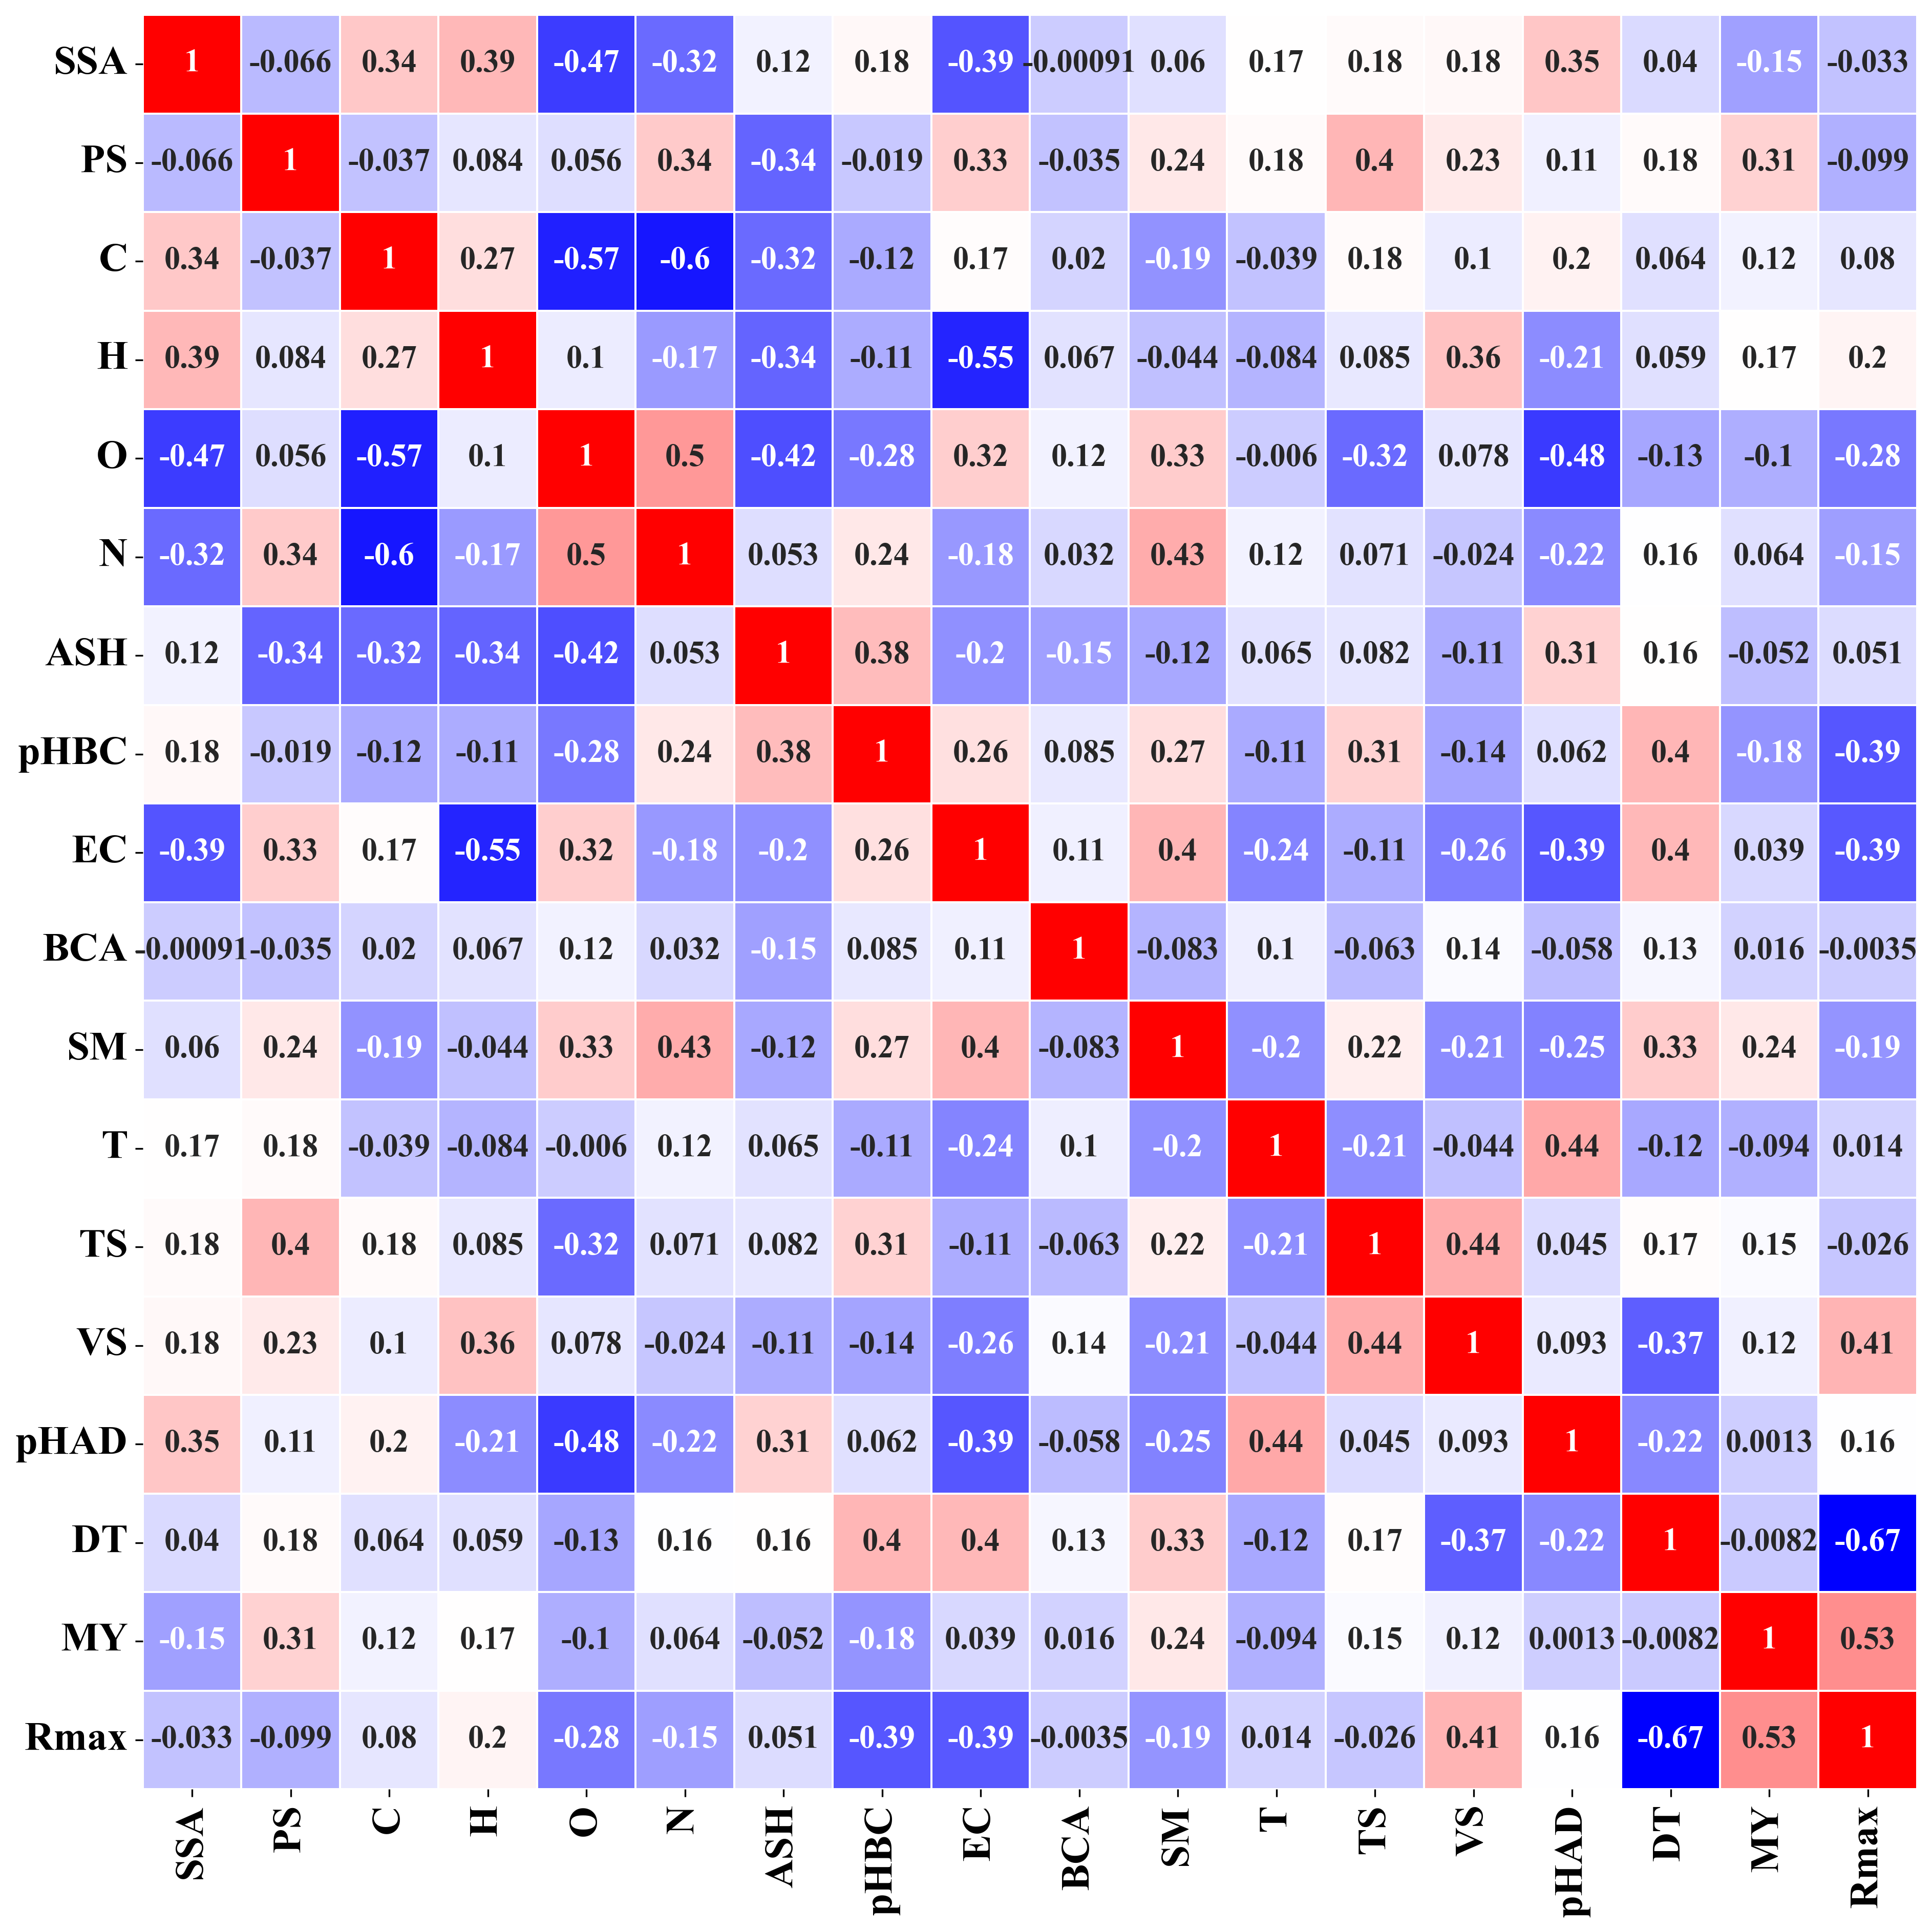

In [23]:
x=data.shape[1]
a=data.iloc[:,0:x].corr(method='spearman')
plt.subplots(figsize=(15, 15),dpi=300)
mask = np.zeros_like(a, dtype=np.bool)   
mask[np.triu_indices_from(mask)]= True 
sns.heatmap(a, annot=True, vmax=1, square=True,cbar_kws={"shrink": 0.8},cmap="bwr",annot_kws={'size':15,"weight":'bold'},linewidths=.5,cbar=False)
plt.xticks(fontsize=19,rotation=90,weight='bold')
plt.yticks(fontsize=19,rotation=360,weight='bold')
plt.show()

In [ ]:
from missingpy import MissForest
imputer = MissForest(random_state=0,criterion="mse",oob_score=True,n_estimators=1000,max_iter=100)
X=imputer.fit_transform(data)
X=pd.DataFrame(X,columns=columns)
X.to_csv('Biochar1.csv', encoding='utf_8')

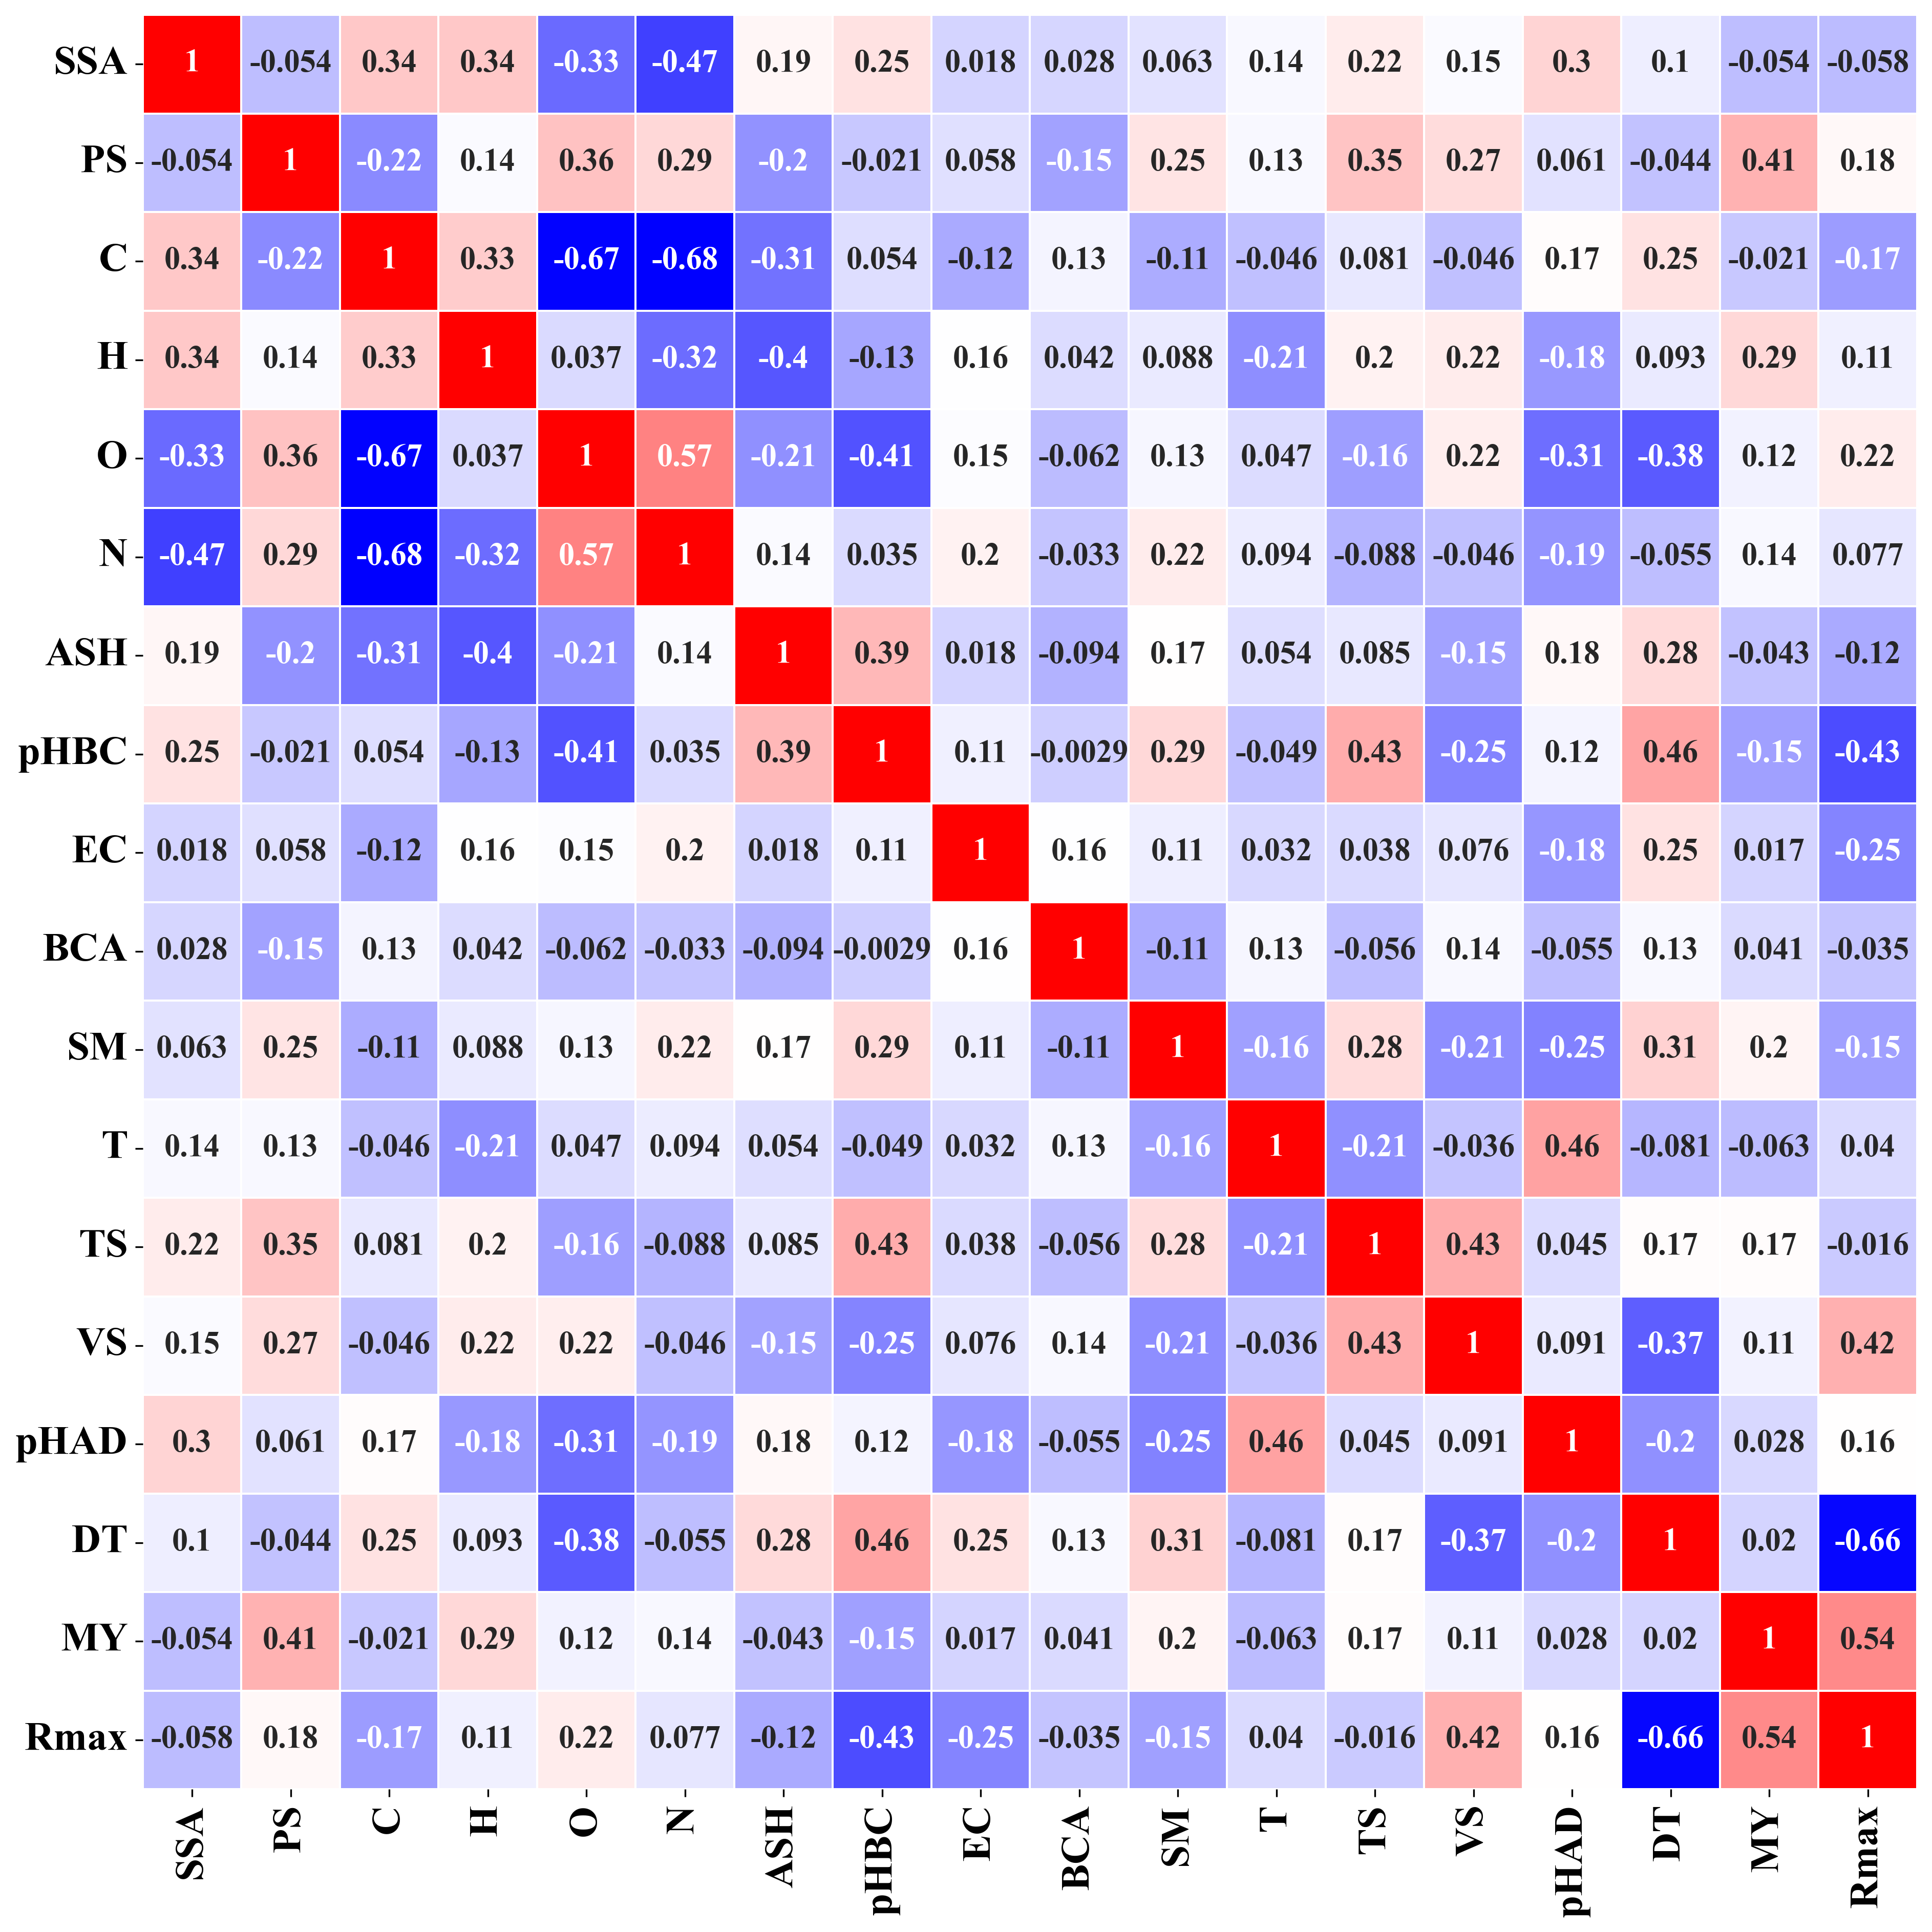

In [24]:
X=pd.read_csv('Biochar1.csv', encoding='utf_8')
x=X.shape[1]
a=X.iloc[:,1:x].corr(method='spearman')
plt.subplots(figsize=(15, 15),dpi=300)
mask = np.zeros_like(a, dtype=np.bool)   
mask[np.tril_indices_from(mask)]= True    
sns.heatmap(a, annot=True, vmax=1, square=True,cbar_kws={"shrink": 0.8},cmap="bwr",annot_kws={'size':15,"weight":'bold'},linewidths=.5,cbar=False)
plt.xticks(fontsize=19,rotation=90,weight='bold')
plt.yticks(fontsize=19,rotation=360,weight='bold')
plt.show()

In [25]:
data1=pd.read_csv('Biochar补.csv')
X = data1.iloc[:,1:-2]
Y=np.array(data1.iloc[:,-1]).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [26]:
from scipy.stats import ttest_ind
pvalue = ttest_ind(X,Y,equal_var=True).pvalue
print(pvalue)

[8.07685487e-10 1.63067709e-19 1.45569057e-01 8.68914347e-19
 9.97425931e-10 1.30101616e-19 5.31338574e-10 4.10961386e-16
 2.50249227e-10 1.99854482e-14 1.60115412e-12 1.76796674e-05
 1.54855810e-08 7.38312895e-02 1.58012282e-16 1.15349646e-06]


In [27]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

In [ ]:
GBR =GradientBoostingRegressor(learning_rate=0.1,loss= 'ls',random_state=0)
parameters = {'n_estimators':range(50,200,4)
            ,"max_depth":range(2,15,1)
            }
GS = RandomizedSearchCV(GBR, parameters, cv=5,return_train_score=True)
GS.fit(X_train,y_train)
Re=pd.DataFrame(GS.cv_results_)
RE1=Re[['param_n_estimators','param_max_depth','mean_train_score']].sort_values(by='mean_train_score')


Train R$^2$ = 1.0
Test R$^2$ = 0.69
Train RMSE = 5.25
Test RMSE = 64.76



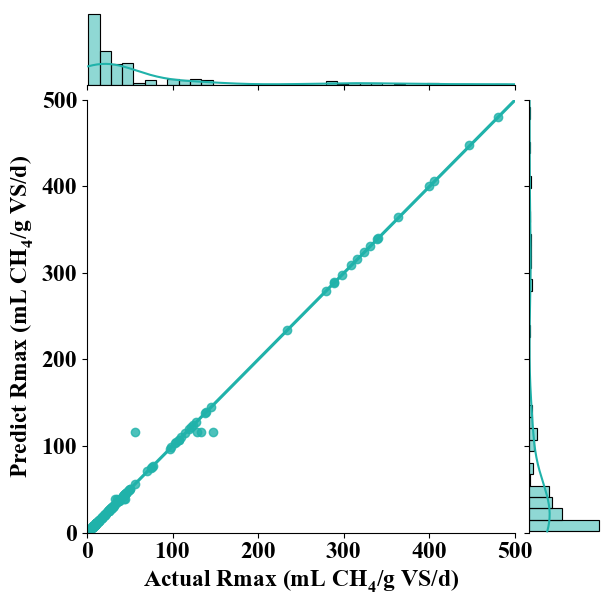

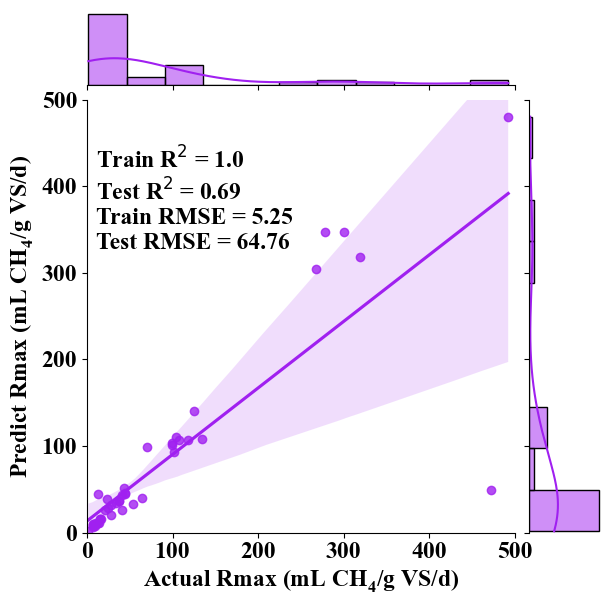

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
GBR =GradientBoostingRegressor(learning_rate=0.1, n_estimators=158, loss= 'ls',max_depth=7,random_state=0)
GBR= GBR.fit(X_train,y_train)
predictY2=GBR.predict(X_test).reshape(-1,1)
predictY1=GBR.predict(X_train).reshape(-1,1)
predictY1f = predictY1
predictY2f = predictY2
score_train = GBR.score(X_train,y_train)
score_train = round(score_train, 2)
score_test =  GBR.score(X_test,y_test)
score_test=round(score_test, 2)
mae = mean_absolute_error(y_test, predictY2f)
mse = mean_squared_error(y_test, predictY2f)
rmse= sqrt(mse)
rmse=round(rmse, 2)
mse_train=mean_squared_error(y_train,predictY1)
rmse_train=sqrt(mse_train)
rmse_train=round(rmse_train, 2)
result = '''
Train R$^2$ = {}
Test R$^2$ = {}
Train RMSE = {}
Test RMSE = {}
'''.format(score_train,score_test, rmse_train, rmse)
print(result)

predictY1=pd.DataFrame(predictY1)
res= pd.DataFrame(np.hstack((y_train, predictY1f)))
res.columns = ['Actual Biogas Production (mL $\mathregular{CH_4}$/g VS)','Predict Biogas Production (mL $\mathregular{CH_4}$/g VS)']
predictY2=pd.DataFrame(predictY2)
ace1=pd.DataFrame(np.hstack((y_test, predictY2f)))
ace1.columns = ['Actual Biogas Production (mL $\mathregular{CH_4}$/g VS)','Predict Biogas Production (mL $\mathregular{CH_4}$/g VS)']
font2 = {'family' : 'Times New Roman',
'size'   : 17,"weight":"bold"}

ax1=sns.jointplot(data=res,x='Actual Biogas Production (mL $\mathregular{CH_4}$/g VS)',y='Predict Biogas Production (mL $\mathregular{CH_4}$/g VS)',kind='reg',color='#20B2AA',xlim=(0,500),ylim=(0,500),marker="o")
plt.xlabel('Actual Rmax (mL $\mathregular{CH_4}$/g VS/d)',fontsize=17,weight="bold")
plt.ylabel('Predict Rmax (mL $\mathregular{CH_4}$/g VS/d)',fontsize=17,weight="bold")
plt.xticks(fontsize=17,weight="bold")
plt.yticks(fontsize=17,weight="bold")

ax2=sns.jointplot(data=ace1,x='Actual Biogas Production (mL $\mathregular{CH_4}$/g VS)',y='Predict Biogas Production (mL $\mathregular{CH_4}$/g VS)',kind='reg',color='#A020F0',xlim=(0,500),ylim=(0,500),marker="o")
plt.text(10,300,result,font2)
plt.xlabel('Actual Rmax (mL $\mathregular{CH_4}$/g VS/d)',fontsize=17,weight="bold")
plt.ylabel('Predict Rmax (mL $\mathregular{CH_4}$/g VS/d)',fontsize=17,weight="bold")
plt.xticks(fontsize=17,weight="bold")
plt.yticks(fontsize=17,weight="bold")
ax1.savefig("GBR/GBRtrain(Rmax).png",dpi=300)
ax2.savefig("GBR/GBRtest(Rmax).png",dpi=300)
plt.show()
from PIL import Image

def blend_two_images():

    img1 = Image.open( "GBR/GBRtrain(Rmax).png ")

    img1 = img1.convert('RGBA')

    img2 = Image.open( "GBR/GBRtest(Rmax).png ")

    img2 = img2.convert('RGBA')

    img = Image.blend(img1, img2, 0.6)

    img.show()
    
    img.save( "GBR/GBR(Rmax).png")

    return

blend_two_images()


Train R$^2$ = 0.97
Test R$^2$ = 0.64
Train RMSE = 16.73
Test RMSE = 70.17



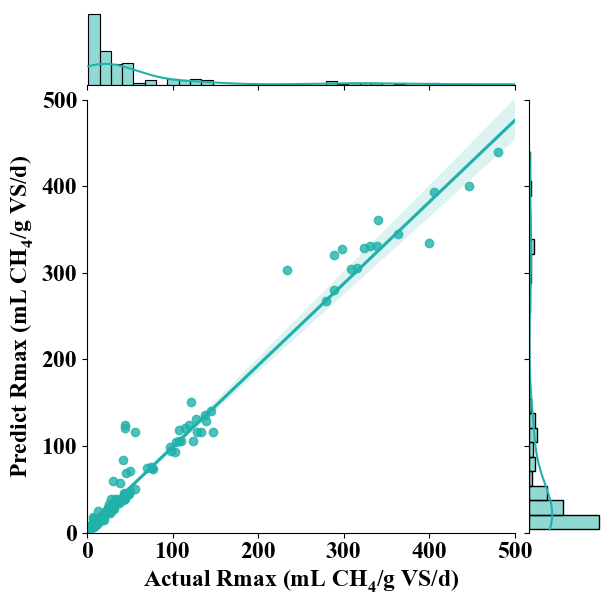

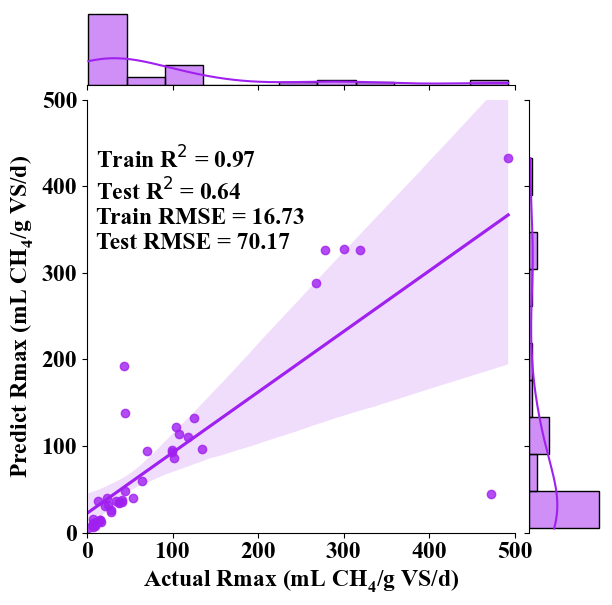

In [32]:
from sklearn.ensemble import RandomForestRegressor as RF
RF=RF(n_estimators=198,max_depth=13,random_state=0)
RF= RF.fit(X_train,y_train)
predictY2=RF.predict(X_test).reshape(-1,1)
predictY1=RF.predict(X_train).reshape(-1,1)
predictY1f = predictY1
predictY2f = predictY2

score_train = RF.score(X_train,y_train)
score_train = round(score_train, 2)
score_test =  RF.score(X_test,y_test)
score_test=round(score_test, 2)
mse = mean_squared_error(y_test, predictY2f)
rmse= sqrt(mse)
rmse=round(rmse, 2)
mse_train=mean_squared_error(y_train,predictY1)
rmse_train=sqrt(mse_train)
rmse_train=round(rmse_train, 2)
result = '''
Train R$^2$ = {}
Test R$^2$ = {}
Train RMSE = {}
Test RMSE = {}
'''.format(score_train, score_test, rmse_train, rmse)
print(result)

predictY1=pd.DataFrame(predictY1)
res= pd.DataFrame(np.hstack((y_train, predictY1f)))
res.columns = ['Actual Biogas Production (mL $\mathregular{CH_4}$/g VS)','Predict Biogas Production (mL $\mathregular{CH_4}$/g VS)']
predictY2=pd.DataFrame(predictY2)
ace1=pd.DataFrame(np.hstack((y_test, predictY2f)))
ace1.columns = ['Actual Biogas Production (mL $\mathregular{CH_4}$/g VS)','Predict Biogas Production (mL $\mathregular{CH_4}$/g VS)']
font2 = {'family' : 'Times New Roman',
'size'   : 17,"weight":"bold"}
# plt.figure(figsize=(5, 5), dpi=300)
ax1=sns.jointplot(data=res,x='Actual Biogas Production (mL $\mathregular{CH_4}$/g VS)',y='Predict Biogas Production (mL $\mathregular{CH_4}$/g VS)',kind='reg',color='#20B2AA',xlim=(0,500),ylim=(0,500),marker="o")
plt.xlabel('Actual Rmax (mL $\mathregular{CH_4}$/g VS/d)',fontsize=17,weight="bold")
plt.ylabel('Predict Rmax (mL $\mathregular{CH_4}$/g VS/d)',fontsize=17,weight="bold")
plt.xticks(fontsize=17,weight="bold")
plt.yticks(fontsize=17,weight="bold")

ax2=sns.jointplot(data=ace1,x='Actual Biogas Production (mL $\mathregular{CH_4}$/g VS)',y='Predict Biogas Production (mL $\mathregular{CH_4}$/g VS)',kind='reg',color='#A020F0',xlim=(0,500),ylim=(0,500),marker="o")
plt.text(10,300,result,font2)
plt.xlabel('Actual Rmax (mL $\mathregular{CH_4}$/g VS/d)',fontsize=17,weight="bold")
plt.ylabel('Predict Rmax (mL $\mathregular{CH_4}$/g VS/d)',fontsize=17,weight="bold")
plt.xticks(fontsize=17,weight="bold")
plt.yticks(fontsize=17,weight="bold")
ax1.savefig("RF/RFtrain(Rmax).png",dpi=300)
ax2.savefig("RF/RFtest(Rmax).png",dpi=300)
plt.show()
from PIL import Image

def blend_two_images():

    img1 = Image.open( "RF/RFtrain(Rmax).png ")

    img1 = img1.convert('RGBA')

    img2 = Image.open( "RF/RFtest(Rmax).png ")

    img2 = img2.convert('RGBA')

    img = Image.blend(img1, img2, 0.6)

    img.show()
    

    img.save( "RF/RF(Rmax).png")

    return

blend_two_images()


Train R$^2$ = 1.0
Test R$^2$ = 0.67
Train RMSE = 5.25
Test RMSE = 67.17



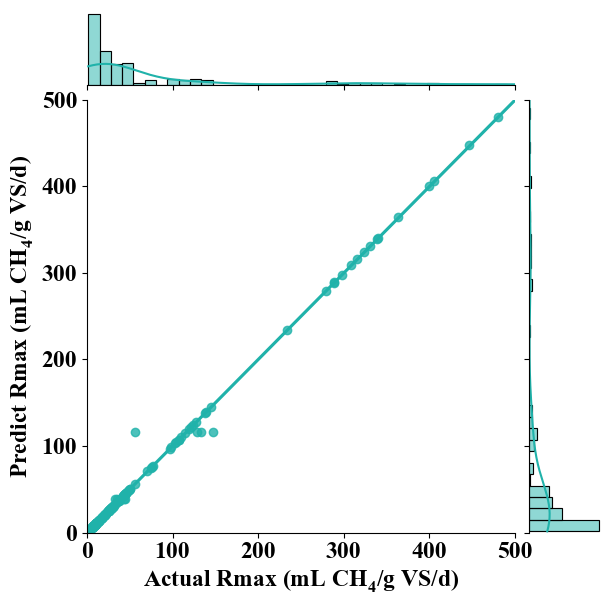

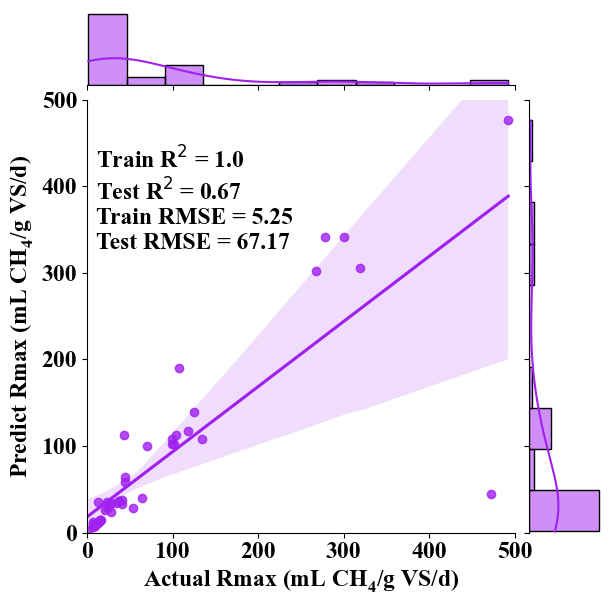

In [31]:
from xgboost import XGBRegressor as XGBR
XGBR =XGBR(n_estimators=100,max_depth=13,min_child_weight=3,random_state=0)
XGBR= XGBR.fit(X_train,y_train)
predictY2=XGBR.predict(X_test).reshape(-1,1)
predictY1=XGBR.predict(X_train).reshape(-1,1)
predictY1f = predictY1
predictY2f = predictY2

score_train = XGBR.score(X_train,y_train)
score_train = round(score_train, 2)
score_test =  XGBR.score(X_test,y_test)
score_test=round(score_test, 2)
mse = mean_squared_error(y_test, predictY2f)
rmse= sqrt(mse)
rmse=round(rmse, 2)
mse_train=mean_squared_error(y_train,predictY1)
rmse_train=sqrt(mse_train)
rmse_train=round(rmse_train, 2)
result = '''
Train R$^2$ = {}
Test R$^2$ = {}
Train RMSE = {}
Test RMSE = {}
'''.format(score_train, score_test, rmse_train, rmse)
print(result)

predictY1=pd.DataFrame(predictY1)
res= pd.DataFrame(np.hstack((y_train, predictY1f)))
res.columns = ['Actual Biogas Production (mL $\mathregular{CH_4}$/g VS)','Predict Biogas Production (mL $\mathregular{CH_4}$/g VS)']
predictY2=pd.DataFrame(predictY2)
ace1=pd.DataFrame(np.hstack((y_test, predictY2f)))
ace1.columns = ['Actual Biogas Production (mL $\mathregular{CH_4}$/g VS)','Predict Biogas Production (mL $\mathregular{CH_4}$/g VS)']
font2 = {'family' : 'Times New Roman',
'size'   : 17,"weight":"bold"}


ax1=sns.jointplot(data=res,x='Actual Biogas Production (mL $\mathregular{CH_4}$/g VS)',y='Predict Biogas Production (mL $\mathregular{CH_4}$/g VS)',kind='reg',color='#20B2AA',xlim=(0,500),ylim=(0,500),marker="o")
plt.xlabel('Actual Rmax (mL $\mathregular{CH_4}$/g VS/d)',fontsize=17,weight="bold")
plt.ylabel('Predict Rmax (mL $\mathregular{CH_4}$/g VS/d)',fontsize=17,weight="bold")
plt.xticks(fontsize=17,weight="bold")
plt.yticks(fontsize=17,weight="bold")

ax2=sns.jointplot(data=ace1,x='Actual Biogas Production (mL $\mathregular{CH_4}$/g VS)',y='Predict Biogas Production (mL $\mathregular{CH_4}$/g VS)',kind='reg',color='#A020F0',xlim=(0,500),ylim=(0,500),marker="o")
plt.text(10,300,result,font2)
plt.xlabel('Actual Rmax (mL $\mathregular{CH_4}$/g VS/d)',fontsize=17,weight="bold")
plt.ylabel('Predict Rmax (mL $\mathregular{CH_4}$/g VS/d)',fontsize=17,weight="bold")
plt.xticks(fontsize=17,weight="bold")
plt.yticks(fontsize=17,weight="bold")
ax1.savefig("XGBR/XGBRtrain(Rmax).png",dpi=300)
ax2.savefig("XGBR/XGBRtest(Rmax).png",dpi=300)
plt.show()
from PIL import Image

def blend_two_images():

    img1 = Image.open( "XGBR/XGBRtrain(Rmax).png ")

    img1 = img1.convert('RGBA')

    img2 = Image.open( "XGBR/XGBRtest(Rmax).png ")

    img2 = img2.convert('RGBA')

    img = Image.blend(img1, img2, 0.6)

    img.show()
    

    img.save( "XGBR/XGBR(Rmax).png")

    return

blend_two_images()

In [33]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
lr=LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
Ri=Ridge()
regressors=[GBR,RF]
stregr=StackingRegressor(regressors=regressors,meta_regressor=lr)
stregr.fit(X_train,y_train)

StackingRegressor(meta_regressor=LinearRegression(),
                  regressors=[GradientBoostingRegressor(loss='ls', max_depth=7,
                                                        n_estimators=158,
                                                        random_state=0),
                              RandomForestRegressor(max_depth=13,
                                                    n_estimators=198,
                                                    random_state=0)])

In [34]:
from sklearn import metrics
stregr_r2_train = metrics.r2_score(y_train,stregr.predict(X_train))
stregr_r2_test = metrics.r2_score(y_test,stregr.predict(X_test))
stregr_rmse_train = sqrt(metrics.mean_squared_error(y_train,stregr.predict(X_train)))
stregr_rmse_test = sqrt(metrics.mean_squared_error(y_test,stregr.predict(X_test)))
stregr_result = '''
Train RMSE: {}
Train $R^2$: {}
Test RMSE: {}
Test $R^2$: {}
'''.format(stregr_rmse_train,stregr_r2_train,stregr_rmse_test,stregr_r2_test)
print(stregr_result)


Train RMSE: 5.251525733157782
Train $R^2$: 0.9972841063062632
Test RMSE: 64.76459627528212
Test $R^2$: 0.6897211945084409



In [37]:
name = data1.columns[1:-2].values.reshape(-1,1)
importance =GBR.feature_importances_.reshape(-1,1)
result= pd.DataFrame(np.hstack((name, importance)))
result.columns = ['Feature name','MY Importance']
result.sort_values(by='MY Importance', ascending=False, inplace=True)
x=data1.columns[1:-2]
y = -sort(-GBR.feature_importances_) 

# import matplotlib as mpl
# blue_s= mpl.colors.LinearSegmentedColormap.from_list('blue_s', 
#                                              [(0,    '#ABDCFF'),
#                                               (1,    '#0396ff')], N=256)
# plt.figure(figsize=(6,5),dpi=300)
# my_palette=sns.color_palette('plasma')
# my_palette=sns.color_palette("ch:2.5,-.2,dark=.3")
# sns.barplot(x=result['MY Importance'], y=result['Feature name'])
# plt.show()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.


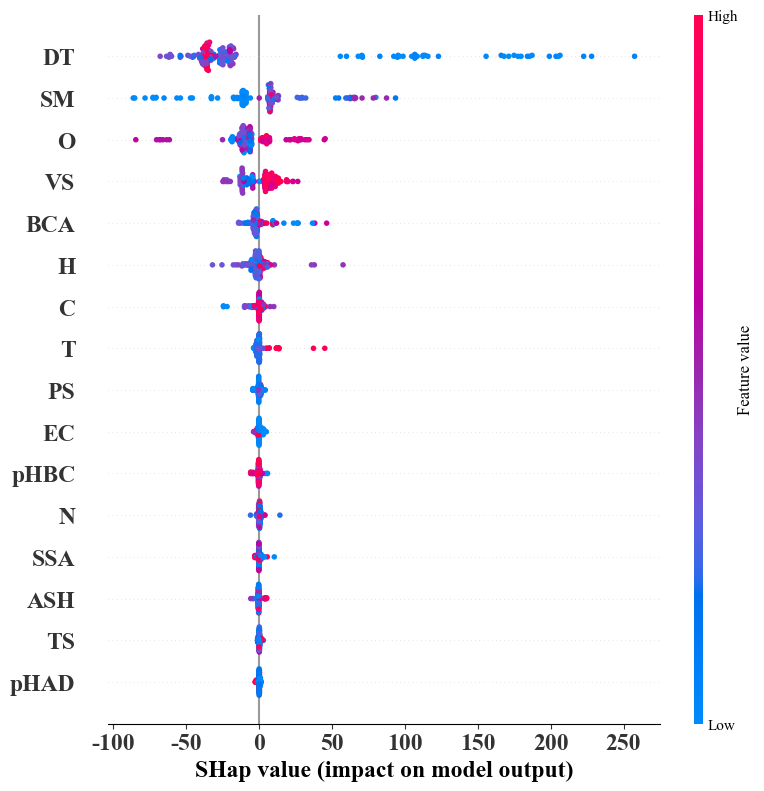

In [35]:
import shap
from sklearn.ensemble import GradientBoostingRegressor as GBR
GBR =GradientBoostingRegressor(learning_rate=0.1, n_estimators=158, loss= 'ls',max_depth=7,random_state=0)
GBR= GBR.fit(X_train,y_train)
shap_values = shap.TreeExplainer(GBR).shap_values(X_train)
shap.summary_plot(shap_values, X_train,show=False)
plt.xticks(fontsize=17,weight="bold")
plt.xlabel("SHap value (impact on model output)",fontsize=17,weight="bold")
plt.yticks(fontsize=17,weight="bold")

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


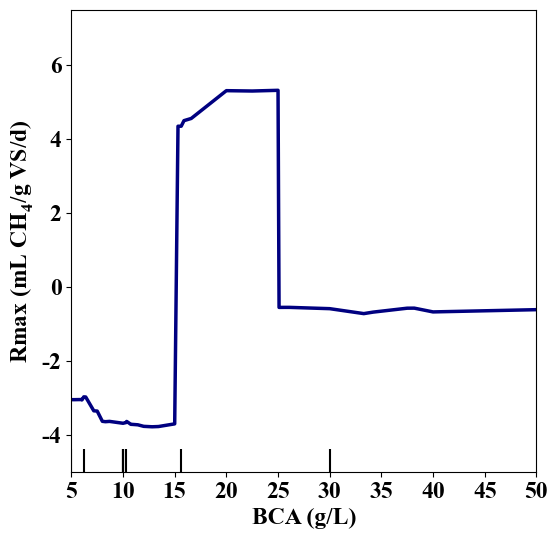

In [49]:
from sklearn.inspection import plot_partial_dependence
fig,ax= plt.subplots(1,1,figsize=(6, 6))
font2 = {'family' : 'Times New Roman','size'   : 12}
tree_disp = plot_partial_dependence(GBR, X, ['BCA'], ax=ax,line_kw={"linewidth":"2.5","color": "#000080"})
plt.xlim(5,50)
plt.ylim(-5,7.5)
plt.xticks(fontproperties = 'Times New Roman', size = 17,weight="bold")
plt.yticks(fontproperties = 'Times New Roman', size =17,weight="bold")
plt.xlabel("BCA (g/L)",fontproperties = 'Times New Roman', size =17,weight="bold")
plt.ylabel("Rmax (mL $\mathregular{CH_4}$/g VS/d)",fontproperties = 'Times New Roman', size =17,weight="bold")

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
A Bunch will be returned in place of 'predictions' from version 1.1 (renaming of 0.26) with partial dependence results accessible via the 'average' key. In the meantime, pass kind='average' to get the future behaviour.


<Figure size 1500x1300 with 0 Axes>

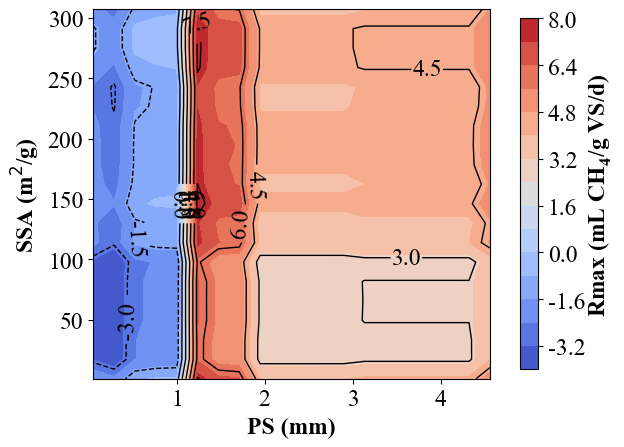

In [62]:
import math
from sklearn.inspection import partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
GBR =GradientBoostingRegressor(learning_rate=0.1, n_estimators=162, loss= 'ls',max_depth=5,random_state=0)
GBR= GBR.fit(X_train,y_train)
col_ulti = data1.columns.values.tolist()
feature_names=['PS','SSA']
fig = plt.figure(figsize=(15,13))
pdp,axes= partial_dependence(GBR, X, features=(1,0),grid_resolution=20)
XX, YY = np.meshgrid(axes[0],axes[1])
Z=pdp[0].T
fig, ax = plt.subplots()
cset=ax.contourf(XX, YY,Z,levels=15,cmap=plt.cm.coolwarm,antialiased=False)#YlOrRd_r

contour = plt.contour(XX,YY,Z,8,colors='k',linewidths=1)
plt.clabel(contour,fontsize=17,colors='k')
plt.xlabel('PS (mm)',fontdict={'family' : 'Times New Roman','size': 17,"weight":"bold"})
plt.ylabel('SSA (m$^2$/g)',
           labelpad=4,
           fontproperties='Times New Roman',
           fontsize=17,
           linespacing=4,
           position=(0,0),
           rotation=90,weight="bold")
plt.xticks(fontproperties = 'Times New Roman', size = 17)
plt.yticks(fontproperties = 'Times New Roman', size = 17)
cbar=plt.colorbar(cset,shrink =0.95,anchor=(0.1,0.5))
cbar.set_label('Rmax (mL $\mathregular{CH_4}$/g VS/d)',fontdict={'family' : 'Times New Roman','size': 17,"weight":"bold"},labelpad=2)
cbar.ax.tick_params(labelsize=17)
for l in cbar.ax.yaxis.get_ticklabels():
    l.set_family('Times New Roman')
plt.show()